# Why use Keras 
Inicialmente fue Theano, sin embargo en los ultimos años tensorflow a logrado
escalar en el entorno de desarroladores en la red, generando una gran cantidad de 
experiencias, modelos, ejemplos tutoriales.
Facebook --- Caffe
Amazon ----  mxnet

Para empezar acodificar en deep learning es necesario empezar con lenguaje de
alto nivel y la mejor libreria es keras, el cual trabaja sobre las plataformas de
tensorflow y theano. 

Definimos la secuencia, luego construimos la secuencia, cada linea es una capa, en la cual definimos la cantidad de neuronas, cada una en secuencia de otra. La libreria coloca cada capa en la misma secuancia en la que son declaradas. 
De la misma manera seleccionamos la funcion de activacion, el metodo para medir el error (Loss) y el metodo de optimizacions (adam, rms, etc).





# Librerias en General

**Step 1 Recolectar una base de datos (dataset)**

In [5]:
import tensorflow as tf
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
K.set_floatx('float32')
danger = pd.read_csv('official_data/lecturas_MPU.csv').iloc[0:11398]
safe = pd.read_csv('official_data/lecturas_MPU2.csv').iloc[0:11398]
testx = pd.read_csv('official_data/lecturas_MPU.csv').iloc[11398:].drop( ['tg'],axis=1)/32767 # target = 1
testy = pd.read_csv('official_data/lecturas_MPU.csv').iloc[11398:][['tg']]
tbl = [danger,safe]
data = pd.concat(tbl)
trainX = data.drop( ['tg'],axis=1)/32767 # escalando
trainY = data[['tg']]
train_x,test_x, train_y, test_y = train_test_split(trainX,trainY,test_size=0.2,random_state=15,shuffle=True)

FileNotFoundError: File b'official_data/lecturas_MPU.csv' does not exist

In [542]:
train_x.describe()

,ax,ay,az,gx,gy,gz
count,18236.000000,18236.000000,18236.000000,18236.000000,18236.000000,18236.000000
mean,0.006985,0.001354,0.009012,-0.002007,0.002515,0.000546
std,0.142035,0.206101,0.175317,0.089590,0.150538,0.089565
min,-0.998444,-0.998596,-0.999817,-0.997681,-0.982940,-0.812616
25%,-0.048433,-0.045007,-0.063997,-0.017426,-0.020608,-0.015412
50%,0.002136,0.003754,-0.002655,0.000031,0.000000,0.000092
75%,0.047617,0.062441,0.060915,0.018708,0.021943,0.020112
max,0.906125,0.680990,0.999023,0.931852,0.998871,0.634388


In [541]:
danger.describe()

,ax,ay,az,gx,gy,gz,tg
count,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.0
mean,630.622127,-98.575452,428.358484,-130.649588,189.084664,24.824092,1.0
std,6431.218227,9502.182379,8019.343033,4124.762847,6996.814348,4150.147933,0.0
min,-32716.000000,-32721.000000,-32761.000000,-32691.000000,-32208.000000,-26627.000000,1.0
25%,-2807.000000,-6759.250000,-4137.500000,-2094.500000,-2790.750000,-1966.750000,1.0
50%,799.000000,799.000000,-911.000000,42.000000,55.000000,129.000000,1.0
75%,4360.750000,7146.000000,3619.750000,2116.000000,2871.000000,2172.750000,1.0
max,29691.000000,23575.000000,32735.000000,30534.000000,32730.000000,20787.000000,1.0


**Step 2 : Construir tu modelo**

In [547]:
# Step 2 : Construir tu modelo
model = Sequential()
model.add(Dense(10, activation = 'tanh',input_shape=(6,)))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'rmsprop',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_311 (Dense)            (None, 10)                70        
_________________________________________________________________
dense_312 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_313 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_314 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_315 (Dense)            (None, 1)                 7         
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


**Step 3 Entrenar la red (train)**

In [548]:
# Step 3 Entrenar la red (train)
# epochs = significa un barrido de todos los datos de entranamiento. Lo que 
#   tenemos ahora son 60 000 imagenes, asi que en cada entrenamiento la red
#   barre con todos los 60 000 datos.
# Loss == Error (en deep learning) 21+21+21+21

history = model.fit(train_x, train_y, epochs = 27,
                    validation_data=(testx, testy))

Train on 18236 samples, validate on 757 samples
Epoch 1/27
18236/18236 [==============================] - 5s 271us/step - loss: 0.6866 - acc: 0.5638 - val_loss: 0.6553 - val_acc: 0.4756
Epoch 2/27
18236/18236 [==============================] - 1s 69us/step - loss: 0.5651 - acc: 0.7482 - val_loss: 0.6073 - val_acc: 0.4822
Epoch 3/27
18236/18236 [==============================] - 1s 66us/step - loss: 0.4939 - acc: 0.7521 - val_loss: 0.5711 - val_acc: 0.4941
Epoch 4/27
18236/18236 [==============================] - 1s 72us/step - loss: 0.4804 - acc: 0.7577 - val_loss: 0.5571 - val_acc: 0.5086
Epoch 5/27
18236/18236 [==============================] - 1s 57us/step - loss: 0.4640 - acc: 0.7723 - val_loss: 0.5585 - val_acc: 0.5363
Epoch 6/27
18236/18236 [==============================] - 1s 52us/step - loss: 0.4138 - acc: 0.8156 - val_loss: 0.5373 - val_acc: 0.6116
Epoch 7/27
18236/18236 [==============================] - 1s 49us/step - loss: 0.3081 - acc: 0.8831 - val_loss: 0.4605 - val_acc:

**Step 4 Evaluar el modelo (Evaluate )**

4560/4560 [==============================] - 0s 34us/step
TEST1 | Perdida = 0.14065261919954436, Presición = 0.9537648613733218
TEST2 | Perdida = 0.08567123346422847, Presición = 0.9769736842105263


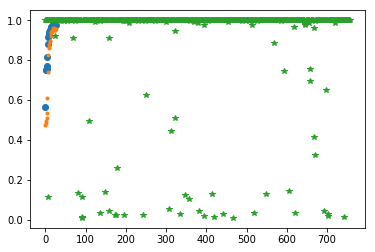

In [560]:
# Step 4 Evaluar el modelo (Evaluate )
loss, accuracy = model.evaluate(testx, testy)
loss2, accuracy2 = model.evaluate(test_x, test_y)
n=2000
scores,real = model.predict(testx), 0
#print('Accuracy% =', accuracy*100) # Es la precisión del modelo ya entrenado
#print('loss      =', loss) # Error del modelo ya entrenado con respecto a nuestro datos de prueba

_=plt.plot(history.epoch,history.history['acc'],'o')
_=plt.plot(history.epoch,history.history['val_acc'],'.' )
_=plt.plot(scores,'*' )
#history.history['loss']
#history.history['val_acc']
print("TEST1 | Perdida = {}, Presición = {}".format(loss, accuracy))
print("TEST2 | Perdida = {}, Presición = {}".format(loss2, accuracy2))

# Extracción de Valores de las matrices de Pesos

In [561]:
# Obteniendo los Pesos y Bias de una Capa
n_layer = 0
B_Input_Hidden = model.layers[n_layer].get_weights()
print("Dimensiones de los pesos de la capa {}: {} ".format(n_layer,B_Input_Hidden[0]))
print("Dimensiones del Bias de la capa {}: {} ".format(n_layer,B_Input_Hidden[1]))

Dimensiones de los pesos de la capa 0: [[ 2.0549965   0.73152137  0.07078217 -0.7290443  -2.2930493  -0.7631958
  -0.8233199   1.5917686  -1.7656589  -0.14494936]
 [-1.3579916  -0.9757451  -1.2048781   0.5304767  -0.9327282   1.6764361
   0.172624    0.5577521  -0.90876377 -0.42663667]
 [ 0.869779   -0.00427562 -0.18320262  0.6315745   0.33462766 -0.0963622
  -0.734544   -0.58336145 -0.04939673  0.78223765]
 [-0.3513457   0.66198003  0.09647669 -0.01301495 -0.07210436  0.31300253
  -0.74321854  0.08663455 -0.20723936  0.2497143 ]
 [ 0.6262538  -0.5896861  -0.16825275 -0.10362005  0.3386229  -0.85132253
   0.11431435  0.67278266  0.20646432  0.7237033 ]
 [ 0.39709014 -0.23298283  0.13151188  0.25553346 -0.22546269 -0.32140878
  -0.26277933  0.17771171 -0.65898424  0.4265563 ]] 
Dimensiones del Bias de la capa 0: [ 0.10846587  0.22224176  0.02659535  0.05782716 -0.00642552  0.13359843
  0.07542766 -0.05395553  0.14789149 -0.04249101] 


In [562]:
# Obteniendo los Pesos y Bias de una Capa
n_layer = 1
B_Input_Hidden = model.layers[n_layer].get_weights()
print("Dimensiones de los pesos de la capa {}: {} ".format(n_layer,B_Input_Hidden[0]))
print("Dimensiones del Bias de la capa {}: {} ".format(n_layer,B_Input_Hidden[1]))

Dimensiones de los pesos de la capa 1: [[ 1.982958    0.49852887  0.0108047   0.07161843  0.04735603  1.1888287
  -2.919036    0.67658335]
 [ 2.3032928   0.48203713  0.2570429   0.17908505  1.2567558   0.49357593
  -1.8713325   0.6098087 ]
 [ 0.37399566  0.55240667 -1.109156   -1.3742007  -0.10651035 -1.1341479
  -0.36480933  0.9192023 ]
 [-0.34679735  0.5442364   0.03793924  0.6785402   1.96818     2.4196203
  -0.0991582  -0.17028022]
 [-0.76667196 -0.202326   -0.93059224 -1.1529652   2.4208324   1.5249335
  -0.7466261   0.49941906]
 [-0.41255048 -0.54698646  1.5698832   1.1906053   0.675963    0.5467384
   1.8784422  -0.97658926]
 [-0.7600907  -0.18641368  1.0323216   0.8869304   2.520573    0.18448111
   0.1333522  -0.78364104]
 [-0.3237455   0.11525488  1.1475712   1.0254271  -2.3948913  -1.8994044
   0.54964155 -0.04168001]
 [ 0.09244436  0.32602373 -0.26574048 -0.5316153   3.4383354   1.5852231
  -0.8917138  -0.1493364 ]
 [ 0.89777595  0.43767595 -0.26948428 -1.2447916   0.181898

In [563]:
# Obteniendo los Pesos y Bias de una Capa
n_layer = 2
B_Input_Hidden = model.layers[n_layer].get_weights()
print("Dimensiones de los pesos de la capa {}: {} ".format(n_layer,B_Input_Hidden[0]))
print("Dimensiones del Bias de la capa {}: {} ".format(n_layer,B_Input_Hidden[1]))

Dimensiones de los pesos de la capa 2: [[ 3.1194048e+00 -1.7216620e+00  3.2598519e-01  1.2772725e+00
   1.0850912e+00 -1.8953481e-01  2.2084205e+00 -8.0055594e-01]
 [-4.0105242e-02 -5.2174300e-01 -7.7560437e-01 -1.1537112e+00
  -1.4206325e+00  8.9169896e-01 -2.9544058e-01  9.7361678e-01]
 [-3.8614254e-02 -6.4679003e-01  2.7312081e+00  8.8321197e-01
   2.1270862e+00 -1.9658288e+00  1.0843894e-01 -1.6189179e+00]
 [ 2.1031250e-01 -1.9949751e-01  2.8239281e+00  2.9935229e-01
   1.3435221e+00 -2.5104961e+00  5.1552451e-01 -2.1122296e+00]
 [ 1.6300604e+00 -1.0446337e+00  1.6332840e+00  1.4484887e+00
   1.7282267e+00 -1.9154168e+00  1.6936052e+00 -1.6453424e+00]
 [ 1.6800208e-01 -1.1920677e+00  5.1681423e-01  1.8418440e+00
   1.1689370e+00 -1.4984118e+00  7.9344720e-01 -1.0724494e+00]
 [-2.4092464e+00  2.9763947e+00 -1.4353437e+00 -2.2452445e+00
  -1.1908485e+00  8.4151345e-01 -1.9663683e+00  1.0246364e+00]
 [ 1.5908353e-03 -1.7836504e-01 -9.3754715e-01 -7.1875101e-01
  -1.8678796e+00  1.9134

In [564]:
# Obteniendo los Pesos y Bias de una Capa
n_layer = 3
B_Input_Hidden = model.layers[n_layer].get_weights()
print("Dimensiones de los pesos de la capa {}: {} ".format(n_layer,B_Input_Hidden[0]))
print("Dimensiones del Bias de la capa {}: {} ".format(n_layer,B_Input_Hidden[1]))

Dimensiones de los pesos de la capa 3: [[-1.0684602  -1.0289813   0.38778698  1.3591895  -1.268505   -0.61100537]
 [ 3.138089    2.7531319  -3.2757506  -2.9995828   3.6078892   3.081388  ]
 [-1.0625443  -0.31779072  0.62106335  0.4297438  -0.9112662  -1.020865  ]
 [-1.1154268  -1.1851511   0.9426039   0.6058121  -1.015511   -1.4914316 ]
 [-0.13504146 -0.81230706  0.75212055  0.31440598 -1.1532211  -1.1172838 ]
 [ 2.251216    3.0667264  -2.1147158  -3.2220414   2.4968786   2.50907   ]
 [-0.8644752  -1.030313    1.4756747   1.4104692  -0.3922202  -0.57539076]
 [ 3.0929515   2.3098907  -2.6028907  -2.2840881   2.3587422   2.8065836 ]] 
Dimensiones del Bias de la capa 3: [ 0.0791825   0.23778811 -0.04999492 -0.02931433  0.48093852  0.4257805 ] 


In [565]:
# Obteniendo los Pesos y Bias de una Capa
n_layer = 4
B_Input_Hidden = model.layers[n_layer].get_weights()
print("Dimensiones de los pesos de la capa {}: {} ".format(n_layer,B_Input_Hidden[0]))
print("Dimensiones del Bias de la capa {}: {} ".format(n_layer,B_Input_Hidden[1]))

Dimensiones de los pesos de la capa 4: [[ 2.7341938]
 [ 2.816239 ]
 [-2.0193458]
 [-1.9935538]
 [ 3.0644875]
 [ 3.5271382]] 
Dimensiones del Bias de la capa 4: [-1.2208393] 
